In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Getting the files
!git clone https://github.com/MoohShadox/Temporary.git
!ls

Cloning into 'Temporary'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.
sample_data  Temporary


# TME Solo

Le sujet le barème est donné à titre indicatif.

## Exercice 1: Cas Pratique

Dans cet exercice nous vous fournissons un ensemble de données puis il s'agira pour vous de répondre a plusieurs questions: 

- les 3 premières questions sont des questions directes qui admettent une réponse unique claire et non ambigue.    
- Dans la derni-re on vous demande de fournir une analyse de votre démarche et des résultats que vous avez obtenus.

Dans tous les cas il vous faudra écrire 2 blocs, 1 bloc de code et un bloc qui explique le résultat et vous serrez évalués sur l'efficacité de votre solution (évitez les boucles for, et si vous en faites privilégiez les comprehension lists).

Voici l'ensemble de données

In [3]:
df = pd.read_csv("Temporary/insertions_pro.csv", index_col=False)
df.drop("Unnamed: 0", axis=1, inplace=True)
df = df.dropna()
df

,annee,diplome,etablissement,academie,domaine,discipline,situation,nombre_de_reponses,taux_de_reponse,taux_dinsertion,de_diplomes_boursiers,taux_de_chomage_regional,salaire_net_mensuel_median_regional,long_academie,lat_academie
0,2016.0,MASTER LMD,Avignon,Aix-Marseille,"Droit, économie et gestion","Ensemble formations juridiques, économiques et...",30 mois après le diplôme,32.0,67.0,91.0,45.0,10.2,1800.0,43.784646,5.356600
1,2016.0,MASTER LMD,Avignon,Aix-Marseille,"Sciences, technologies et santé",Sciences de la vie et de la terre,30 mois après le diplôme,31.0,83.0,71.0,45.0,10.2,1800.0,43.784646,5.356600
2,2017.0,MASTER LMD,Aix-Marseille,Aix-Marseille,Sciences humaines et sociales,Ensemble sciences humaines et sociales,30 mois après le diplôme,258.0,70.0,88.0,33.0,9.1,1840.0,43.784646,5.356600
3,2017.0,MASTER LMD,Aix-Marseille,Aix-Marseille,Sciences humaines et sociales,Autres sciences humaines et sociales,30 mois après le diplôme,66.0,71.0,88.0,33.0,9.1,1840.0,43.784646,5.356600
4,2017.0,MASTER LMD,Aix-Marseille,Aix-Marseille,"Sciences, technologies et santé",Sciences fondamentales,30 mois après le diplôme,50.0,73.0,92.0,33.0,9.1,1840.0,43.784646,5.356600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6904,2015.0,MASTER LMD,Paris Nanterre,Versailles,"Droit, économie et gestion",Gestion,18 mois après le diplôme,81.0,59.0,88.0,27.0,7.8,2060.0,48.827458,2.158779
6905,2015.0,MASTER ENS,Cergy-Pontoise,Versailles,Masters enseignement,Masters enseignement,18 mois après le diplôme,223.0,71.0,99.0,9.0,7.8,2060.0,48.827458,2.158779
6906,2015.0,MASTER LMD,Cergy-Pontoise,Versailles,"Droit, économie et gestion","Ensemble formations juridiques, économiques et...",30 mois après le diplôme,160.0,71.0,92.0,16.0,7.8,2060.0,48.827458,2.158779
6907,2015.0,MASTER LMD,Cergy-Pontoise,Versailles,"Droit, économie et gestion",Droit,18 mois après le diplôme,44.0,74.0,88.0,16.0,7.8,2060.0,48.827458,2.158779


Il représente l'évolution de l'insertion professionnelle entre 2010 et 2017 pour des universitaires (comme vous) qui étudient différentes disciplines dans différentes universités, chacune appartenant a une région (la colonne académie).

Pour chaque région il est spécifié le taux de chômage régional de chaque année, ainsi que sa longitude et sa lattitude.

In [4]:
np.unique(df.annee)

array([2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.])

### Questions directes

1- Combien y'a il d'établissements représentés par cette étude ? (1pt) 
Indication : utiliser .shape[0] pour formatter correctement le résultat

77

2- Récupérer les valeurs possibles des noms d'académie. (1pt)

array(['Aix-Marseille', 'Amiens', 'Besançon', 'Bordeaux',
       'Clermont-Ferrand', 'Créteil', 'Dijon', 'Grenoble', 'Lille',
       'Limoges', 'Lyon', 'Montpellier', 'Nancy-Metz', 'Nantes', 'Nice',
       'Orléans-Tours', 'Paris', 'Poitiers', 'Reims', 'Rennes',
       'Strasbourg', 'Toulouse', 'Versailles'], dtype=object)

3- Pour chaque région, identifier la liste des établissements. (1pt)

{'Aix-Marseille': array(['Aix-Marseille', 'Avignon'], dtype=object),
 'Amiens': array(['Amiens - Picardie Jules-Verne'], dtype=object),
 'Besançon': array(['Besançon - Franche-Comté'], dtype=object),
 'Bordeaux': array(['Bordeaux', 'Bordeaux - Montaigne',
        'Bordeaux 1 - Sciences technologies',
        'Bordeaux 2 - Victor Segalen', 'Bordeaux 4 - Montesquieu',
        "Pau - Pays de l'Adour"], dtype=object),
 'Clermont-Ferrand': array(['Clermont Auvergne', 'Clermont-Ferrand 1 - Auvergne',
        'Clermont-Ferrand 2 - Blaise Pascal'], dtype=object),
 'Créteil': array(['Paris 8 - Vincennes Saint-Denis', 'Paris-Est Créteil',
        'Paris-Est Marne-la-Vallée', 'Université Sorbonne Paris Nord'],
       dtype=object),
 'Dijon': array(['Dijon - Bourgogne'], dtype=object),
 'Grenoble': array(['Grenoble 1 - Joseph Fourier', 'Grenoble 2 - Pierre Mendès France',
        'Grenoble 3 - Stendhal', 'Grenoble Alpes', 'Savoie Mont Blanc'],
       dtype=object),
 'Lille': array(['Artois', 'Lill




4- Identifier la région qui a le plus d'établissements.  Celle qui en a le moins. Préciser les valeurs de min et max pour chaque cas (1pt)

Le plus:  Paris  avec:  9
Le moins:  Amiens  avec:  1


### Question indirecte
Cette question est moins guidée, vous devez réaliser la bonne analyse et commenter les résultats.

1- Le salaire est il proportionnel à l'éloignement vis-à-vis de Paris ? (indice: pensez à la corrélation) (2pt + 1 pt l'analyse)

array([[ 1.        , -0.49965617],
       [-0.49965617,  1.        ]])

## Exercice 02 : Manipulation de lois

Dans cet exercice, on s'intéresse à la consommation d'éléctricité durant une année, on modelisera cette consommation de différentes façons, avec différentes lois.

L'ensemble de données montre l'évolution de la consommation éléctrique d'un foyer en fonction de la température, de l'heure, du jour de la semaine, et de la date.

Cette consommation est représentée sous 4 formes: 
- consumption représente la consommation sous forme de flottant.
- 3_levels représente la consommation représentée sur une échelle allant de 1 à 3 (1 peu, 2 moyen, 3 beaucoup)
- 5_levels représente la consommation représentée sur une échelle allant de 1 à 3 (1 peu, ... , 5 beaucoup)
- 7_levels représente la consommation représentée sur une échelle allant de 1 à 3 (1 peu, ... , 7 beaucoup)

In [6]:
df = pd.read_csv("Temporary/energy_consumption_levels.csv")
df

,3_levels,5_levels,7_levels,consumption,temperature,hour_of_day,day_of_week,day_of_month,month_of_year
0,1,1,1,0.255000,-6.0,1,5,1,1
1,1,1,1,0.264000,-6.9,2,5,1,1
2,1,1,1,0.253000,-7.1,3,5,1,1
3,1,1,1,0.250000,-7.2,4,5,1,1
4,1,1,1,0.234000,-7.5,5,5,1,1
...,...,...,...,...,...,...,...,...,...
8779,3,4,6,0.842919,-1.9,20,6,31,12
8780,3,4,6,0.853757,-3.0,21,6,31,12
8781,2,2,3,0.631713,-3.4,22,6,31,12
8782,1,2,3,0.465262,-3.2,23,6,31,12


### Loi normale

Nous considérons pour chaque jour de la semaine la consommation réelle représentée par la colonne consumption.

1) Ecrivez une fonction qui renvoie un vecteur de consommations correspondant a un jour donné de la semaine passé en paramètre.

In [ ]:
def get_consomation(jour):
    return arr

2) Testez cette fonction 

In [ ]:
get_consomation(1)

array([0.295     , 0.291     , 0.29      , ..., 0.64029548, 0.41271847,
       0.37450984])

3) Afficher un diagramme de violons de consommation par jour de la semaine (violinplot(array))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'bodies': [<matplotlib.collections.PolyCollection at 0x7ff46cde6f10>,
 'cbars': <matplotlib.collections.LineCollection at 0x7ff46cdfb2d0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7ff46cde6c10>,
 'cmins': <matplotlib.collections.LineCollection at 0x7ff46cdfbc50>}

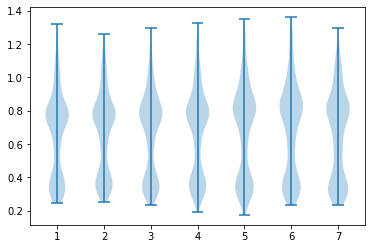

4) Ecrire une fonction qui étant donné une série de nombre réels renvoie les paramètres de la loi normale ($\mu$, $\sigma^2$).

In [ ]:
def get_normal(x):
  #VOTRE CODE

5) Récupérer pour chaque jour de la semaine les paramètres de la loi normale associée à la consommation électrique.

In [ ]:
normales_consumption = [## VOTRE CODE]
normales_consumption

[(0.65879280990625, 0.06207788736623546),
 (0.6682843701530449, 0.05888260663451147),
 (0.665888570766827, 0.06124391273126134),
 (0.6744616025753205, 0.06543729535050985),
 (0.6816437214441824, 0.07373021150675024),
 (0.6893045187177672, 0.07516774084296009),
 (0.6604842706899038, 0.06948845594836761)]

6) Ecrire une fonction sample_week() qui prend en entrée un array stockant tous les paramètres de la loi normale pour chacun des jours de la semaine (question 5). Pour chaque jeu de paramètres ($\mu$, $\sigma^2$), on tire selon une loi normale une valeur de consommation. Le tout correspond à la consommation d'une semaine suivant les lois respectives de chaque jour de le semaine. 


In [ ]:
def sample_week(normales_consumption):
    cons = [## VOTRE CODE]
    return np.array(cons)

In [ ]:
sample_week(normales_consumption)

array([0.7071809 , 0.72654703, 0.69801357, 0.72105859, 0.66096288,
       0.57938304, 0.69396369])

7) Calculer la consommation moyenne de 700 tirages, 7000 tirages, 70000 tirages (qu'on tire 7 par 7 en utilisant sample_week) et comparez la avec la consommation moyenne que vous récupérer du dataset.

In [ ]:
## VOTRE CODE

0.6769698652381656

In [ ]:
## VOTRE CODE

0.6719283445707447

In [ ]:
## VOTRE CODE

0.6715535184384759

In [ ]:
## VOTRE CODE

0.6713433365610222

### Regression Linéaires
On considère le tableau suivant stocké dans la variable grouped :

In [ ]:
grouped = df.groupby("temperature").mean().reset_index()[["temperature", "consumption"]]
grouped

,temperature,consumption
0,-21.8,0.8410
1,-21.2,0.3190
2,-20.5,0.4175
3,-20.4,0.3020
4,-20.3,0.6520
...,...,...
529,35.4,1.2740
530,35.5,1.2230
531,36.3,1.2840
532,36.4,1.2980


1) Afficher le graphique qui exprime la température en fonction de la consommation.

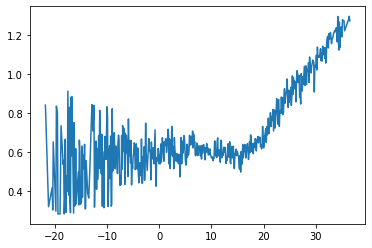

In [ ]:
## VOTRE CODE

2) Calculer le modèle :
$$ y = ax + b $$ ou $x$ est la température et $y$ la consommation.

En d'autres termes, trouver les valeurs de a et b et construire une fonction prediction(a,b) qui prédit la consommation en fonction de la température.

In [ ]:
#VOTRE CODE

w = [a,b] #tel que y = ax + b
w

array([0.01094282, 0.60676202])

3) Afficher la droite de regression par dessus la courbe précédente, commenter.

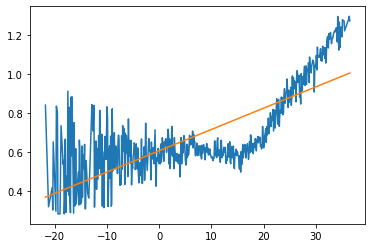

In [ ]:
#VOTRE CODE

4) Calculer le coefficient de corrélation linéraire entre la température et la consommation. Commenter.

In [7]:
#VOTRE CODE

array([[1.        , 0.43409147],
       [0.43409147, 1.        ]])